In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Data Cleaning and Filtering**

In [2]:
# Data Filtering - we are keeping samples of all the people who smokes and drinks on regular basis

sd_df_raw = pd.read_csv('smoking_driking_dataset_Ver01.csv')
sd_df=sd_df_raw[sd_df_raw['SMK_stat_type_cd']==3]
sd_df=sd_df[sd_df['DRK_YN']=='Y']
sd_df=sd_df.reset_index()
sd_df=sd_df.drop(columns='index')
sd_df.to_csv('SmokingandDrinkingData.csv')


In [3]:
sd_df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
1,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
2,Male,60,165,60,85.0,0.3,0.7,1.0,1.0,120.0,...,111.0,222.0,15.2,1.0,1.0,19.0,20.0,48.0,3.0,Y
3,Male,25,175,65,82.0,1.5,1.5,1.0,1.0,130.0,...,134.0,57.0,16.7,1.0,1.2,28.0,30.0,32.0,3.0,Y
4,Male,60,170,75,87.0,0.7,0.7,1.0,1.0,119.0,...,104.0,150.0,15.9,1.0,0.7,31.0,29.0,76.0,3.0,Y


In [4]:
# Identifying and creating categories of various features(BP, Diabetes, Triglyceride, Hemoglobin, Kidney, Liver, BMI)

sd_df['SBP_cat']=sd_df['SBP'].apply(lambda x: 'Normal' if x in range(110,141) else ('High' if x in range(141,300) else 'Low'))
sd_df['DBP_cat']=sd_df['DBP'].apply(lambda x: 'Normal' if x in range(70,91) else ('High' if x in range(91,200) else 'Low'))
sd_df['Diabetes']=sd_df['BLDS'].apply(lambda x: 'No' if x in range(80,141) else ('Yes' if x < 80 or x > 200 else 'Pre' ))
sd_df['Triglyceride']=sd_df['triglyceride'].apply(lambda x: 'Normal' if x <= 150 else ('Borderline' if x > 151 and x < 151 else 'High' ))

for i in range(0,len(sd_df)):
  if sd_df.loc[i,'sex']=='Male' and (sd_df.loc[i,'hemoglobin']>=13 and sd_df.loc[i,'hemoglobin']<=18):
    sd_df.loc[i,'hemoglobin_sorted']='Normal'
  elif sd_df.loc[i,'sex']=='Female' and (sd_df.loc[i,'hemoglobin']>=12 and sd_df.loc[i,'hemoglobin']<=15):
    sd_df.loc[i,'hemoglobin_sorted']='Normal'
  elif  sd_df.loc[i,'hemoglobin']<12:
    sd_df.loc[i,'hemoglobin_sorted']='Low'
  else:
    sd_df.loc[i,'hemoglobin_sorted']='High'

sd_df['Kidney']=sd_df['serum_creatinine'].apply(lambda x: 'Normal' if (x>0.3 and x<1.7) else ('Failure' if x > 3.8 else 'Disease' ))
sd_df['Liver_ALT']=sd_df['SGOT_ALT'].apply(lambda x: 'Normal' if (x>=9 and x<=42) else ('vitB6 def' if x < 9 else ('Disease' if x>=43 and x<90 else 'Failure') ))
sd_df['Liver_AST']=sd_df['SGOT_AST'].apply(lambda x: 'Normal' if (x>=5 and x<=55) else ('vitB6 def' if x < 5 else ('Disease' if x>=55 and x<90 else 'Failure') ))
sd_df['Liver']=sd_df[['Liver_ALT','Liver_AST']].apply(lambda x: x['Liver_ALT'] if x['Liver_ALT']==x['Liver_AST'] else x['Liver_ALT'], axis=1)
sd_df['BMI'] = (sd_df.weight/((sd_df.height/100) ** 2)).round()

### **Data Analysis**

<Axes: xlabel='age', ylabel='tot_chole'>

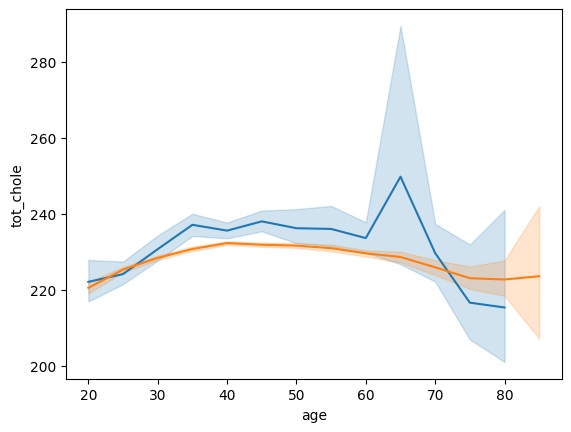

In [5]:
diabetic_df = sd_df[sd_df['Diabetes']=='Yes']
diab_HighChol = diabetic_df[diabetic_df['tot_chole']>200]
nondiab_df = sd_df[sd_df['Diabetes']=='No']
nondiab_HighChol = nondiab_df[nondiab_df['tot_chole']>200]

#diab_HighChol[diab_HighChol['waistline'].max()]
sns.lineplot(diab_HighChol,x='age',y='tot_chole')
sns.lineplot(nondiab_HighChol,x='age',y='tot_chole',legend=True)

Blue line represents - People who are diabetic, suffers from high total cholestrol, which can lead to many heart diseases compared to the people who are non-diabetic (orange line). Hence, their life expectancy range decreases.

<Axes: xlabel='age', ylabel='HDL_chole'>

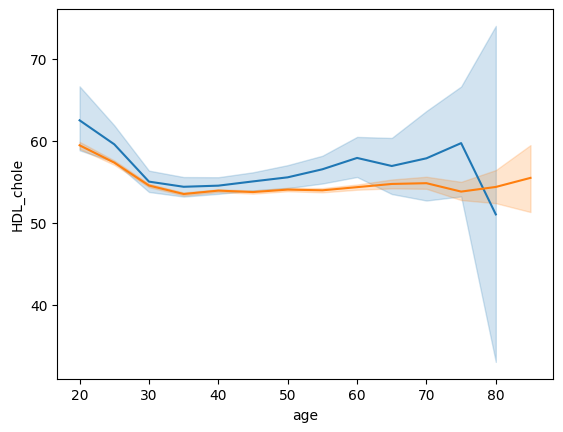

In [6]:
sns.lineplot(diab_HighChol,x='age',y='HDL_chole')
sns.lineplot(nondiab_df,x='age',y='HDL_chole')

Blue line represents high HDL for diabetic people and orange represents normal HDL for non-diabetic people. Since HDL is a good cholestrol, so even if the value increases the normal range it will not have an adverse effect on the heart. Hence, this parameter is not directly co-related to our research.

<Axes: xlabel='age', ylabel='LDL_chole'>

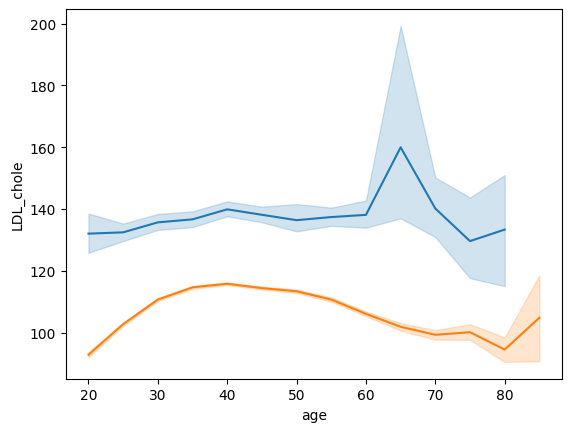

In [7]:
sns.lineplot(diab_HighChol,x='age',y='LDL_chole')
sns.lineplot(nondiab_df,x='age',y='LDL_chole')

Blue line represents high LDL levels for diabetic persons which is very harmful to the heart and is a major reason for heart-attacks compared to orange line for non-diabetic persons. Hence this parameter is a mjaor factor to be considered in our dataset.

<Axes: xlabel='LDL_chole', ylabel='count'>

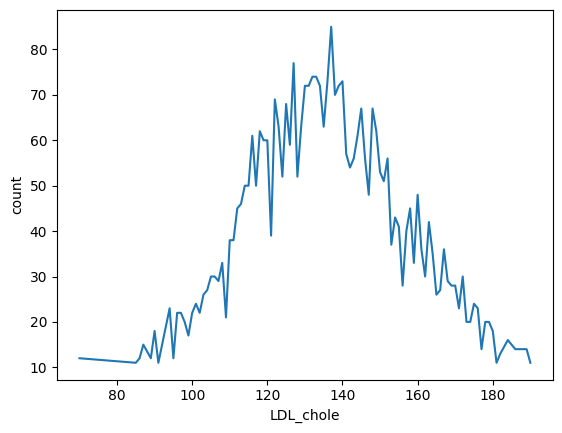

In [8]:
df=(pd.DataFrame(diab_HighChol['LDL_chole'].value_counts())).reset_index()
df = df.rename(columns={'index':'LDL_chole','LDL_chole':'count'})
df = df[df['count']>10]
sns.lineplot(df,x='LDL_chole',y='count')

The above graph represents the count of people having various LDL levels. It shows that maximum people have LDL values ranging above 120 which is a poor heart indicator. Hence, most of the samples in the dataset will suffer heart issues in future and their life ecpectancy will directly depend on one of these factors.

<ipython-input-9-827d7a6afb6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic_df['BMI'] = diabetic_df.weight/((diabetic_df.height/100) ** 2)
<ipython-input-9-827d7a6afb6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondiab_df['BMI'] = nondiab_df.weight/((nondiab_df.height/100) ** 2)


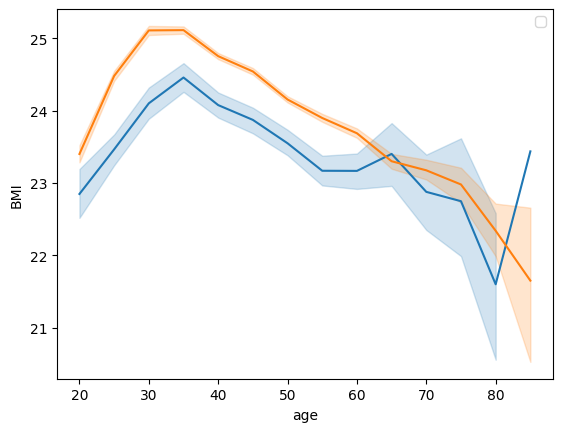

In [9]:
diabetic_df['BMI'] = diabetic_df.weight/((diabetic_df.height/100) ** 2)
nondiab_df['BMI'] = nondiab_df.weight/((nondiab_df.height/100) ** 2)
sns.lineplot(diabetic_df,x='age',y='BMI')
sns.lineplot(nondiab_df,x='age',y='BMI')
plt.legend()
plt.show()

Higher BMI levels are indicators of obesity which is one of the main reasons of all the health issues today. From the graph we can see, non-diabetic people(orange line) have higher BMI index compared ot diabetic people. So we can conclude that BMI is not related to diabetes and may be concerned with other parameters.

In [10]:
# weight is directly propotional to serum_creatinine, less or more creatinine value = chronic kidney disease/kidney failure
sc_df = pd.DataFrame(sd_df['serum_creatinine'].value_counts()).reset_index()
sc_df['index'].min()
(sd_df[sd_df['serum_creatinine']<0.6])['weight'].min()

35

In [11]:
# chronic kidney disease is propotional to low values of SGOT_ALT -
# People who suffer kidney issues may suffer from liver diseases in future and viz-a-viz.
# Hence, lowering life expectancy ratios.
sd_df[sd_df['Kidney']=='Normal'][sd_df[sd_df['Kidney']=='Normal']['SGOT_ALT']>45].head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,SBP_cat,DBP_cat,Diabetes,Triglyceride,hemoglobin_sorted,Kidney,Liver_ALT,Liver_AST,Liver,BMI
5,Male,40,175,75,87.3,0.7,0.9,1.0,1.0,118.0,...,Normal,Normal,No,High,Normal,Normal,Disease,Normal,Disease,24.0
11,Male,65,160,60,82.0,0.9,0.8,1.0,1.0,130.0,...,Normal,Normal,No,High,Normal,Normal,Disease,Normal,Disease,23.0
12,Male,40,160,65,85.0,1.2,1.2,1.0,1.0,120.0,...,Normal,Normal,No,High,Normal,Normal,Failure,Normal,Failure,25.0
17,Male,60,170,75,92.0,1.5,1.2,1.0,1.0,140.0,...,Normal,Normal,No,High,High,Normal,Disease,Normal,Disease,26.0
18,Male,45,170,95,98.0,1.2,0.9,1.0,1.0,135.0,...,Normal,Normal,No,High,Normal,Normal,Disease,Normal,Disease,33.0


# **Unsupervised Model -- DB Scan**

In [12]:
sd_df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN', 'SBP_cat', 'DBP_cat',
       'Diabetes', 'Triglyceride', 'hemoglobin_sorted', 'Kidney', 'Liver_ALT',
       'Liver_AST', 'Liver', 'BMI'],
      dtype='object')

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

def dbscan_Model(sd_df,age):
  sd_df_age = sd_df[sd_df['age']==age].reset_index()

  sd_df_fin = sd_df_age.drop(columns=['SBP', 'DBP', 'BLDS','triglyceride', 'hemoglobin','serum_creatinine',
       'SGOT_AST', 'SGOT_ALT','age','Liver_ALT', 'Liver_AST','SMK_stat_type_cd', 'DRK_YN','sight_left',
       'sight_right', 'hear_left', 'hear_right', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'urine_protein', 'gamma_GTP','height', 'weight','sex','waistline', 'SBP_cat', 'DBP_cat','BMI'], axis=1)

  #label_encoder = LabelEncoder()
  #for col in sd_df_fin.columns:
  #sd_df_fin[col] = label_encoder.fit_transform(sd_df_fin[col])

  categorical_cols = sd_df_fin.select_dtypes(include=['object']).columns
  sd_df_fin = pd.get_dummies(sd_df_fin, columns=categorical_cols)

  scaler = MinMaxScaler()
  new_sd = scaler.fit_transform(sd_df_fin)

  clustering = DBSCAN(eps=1.4, min_samples=5).fit(new_sd)
  DBSCAN_dataset = new_sd.copy()
  #DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

  sd_df_fin = sd_df_age.drop(columns=['SBP', 'DBP', 'BLDS','triglyceride', 'hemoglobin','serum_creatinine',
       'SGOT_AST', 'SGOT_ALT','Liver_ALT', 'Liver_AST','SMK_stat_type_cd', 'DRK_YN','sight_left',
       'sight_right', 'hear_left', 'hear_right', 'tot_chole', 'HDL_chole',
       'LDL_chole'], axis=1)

  sd_df_fin['Cluster']=clustering.labels_
  return sd_df_fin

Running DBScan for all the age groups, identifying and naming clusters

In [14]:
# initial run
data_count=0
fin_df=pd.DataFrame()
for a in sd_df['age'].unique():
#for a in [50]:
  print(a)

  sd_df_fin=dbscan_Model(sd_df,a)
  data_count = data_count+len(sd_df_fin)

  cls_list = (sd_df_fin.Cluster.unique()).tolist()
  cls_list.remove(-1)
  #print(cls_list)
  cls_name_dict={}

  for cls in cls_list:
    df_1 = sd_df_fin[sd_df_fin['Cluster']==cls]
    wrd = (df_1['Diabetes'].unique()+'Diabetes_'+df_1['Triglyceride'].unique()+'Triglyceride_'+df_1['hemoglobin_sorted'].unique()+'hemoglobin_'+df_1['Kidney'].unique()+'Kidney_'+df_1['Liver'].unique()+'Liver')
    name=[]
    for i in wrd[0].split('_'):
      if ('No' in i) == False:
        name.append(i)
    cls_name_dict[cls]=('_').join(name)
  #print(cls_name_dict)
  sd_df_fin["ClusterName"] = sd_df_fin["Cluster"].map(cls_name_dict)
  fin_df = fin_df.append(sd_df_fin)
  #sd_df_fin.to_csv('Clusters/'+str(a)+'.csv')

print(data_count)


50


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


35


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


60


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


25


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


40


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


30


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


55


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)
<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


65
45


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)
<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


70
20
75
80
85
161577


<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)
<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)
<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)
<ipython-input-14-68584b3378e7>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin_df = fin_df.append(sd_df_fin)


1. Handling DBScan outliers (clusters marked as -1)
2. Creating final sheet for all the clusters  - final outcome of Unsupervised Learning Model

In [15]:
#df_1 = fin_df.drop_duplicates().reset_index()#[fin_df['Cluster']==-1].reset_index()
df_1 = fin_df.reset_index()

for i in range(0,len(df_1)):
  if df_1.loc[i,'Cluster']==-1:
    wrd = (df_1.loc[i,'Diabetes']+'Diabetes_'+df_1.loc[i,'Triglyceride']+'Triglyceride_'+df_1.loc[i,'hemoglobin_sorted']+'hemoglobin_'+df_1.loc[i,'Kidney']+'Kidney_'+df_1.loc[i,'Liver']+'Liver')
    name=[]
    for w in wrd.split('_'):
      if ('No' in w) == False:
        name.append(w)
    name=('_').join(name)
    print(name)
    df_1.loc[i,'ClusterName']=name
df_1.to_csv('FinalClusters_v3.csv')

PreDiabetes_HighTriglyceride_Lowhemoglobin
YesDiabetes_Highhemoglobin_vitB6 defLiver
PreDiabetes_Lowhemoglobin_vitB6 defLiver
PreDiabetes_Highhemoglobin_DiseaseLiver
PreDiabetes_Highhemoglobin_DiseaseLiver
PreDiabetes_HighTriglyceride_Highhemoglobin_FailureKidney
YesDiabetes_DiseaseKidney
PreDiabetes_HighTriglyceride_vitB6 defLiver
HighTriglyceride_Highhemoglobin_DiseaseKidney
YesDiabetes_HighTriglyceride_Highhemoglobin_FailureLiver
PreDiabetes_HighTriglyceride_Highhemoglobin_FailureLiver
HighTriglyceride_Lowhemoglobin_FailureKidney
FailureKidney
PreDiabetes_HighTriglyceride_Lowhemoglobin_DiseaseLiver
PreDiabetes_DiseaseKidney
PreDiabetes_vitB6 defLiver
PreDiabetes_HighTriglyceride_vitB6 defLiver
PreDiabetes_HighTriglyceride_Lowhemoglobin_DiseaseKidney_DiseaseLiver
YesDiabetes_HighTriglyceride_Highhemoglobin_DiseaseLiver
YesDiabetes_HighTriglyceride_DiseaseKidney
HighTriglyceride_Lowhemoglobin_vitB6 defLiver
YesDiabetes_Lowhemoglobin_FailureLiver
YesDiabetes_HighTriglyceride_Highhemogl

### Creating Cluster age groups using Google search

With a lot of Google research for various clusters, the future life expectancy and diseases a person in a particular cluster can encounter were formulazised using 'FinalClusters_v3.csv' and 'ClusterIdentificationFormula_v2.csv' was created.
This excel sheet has 127 clusters which are defined with various future diseases and approximate age calculation formula.


## Final Output CSV

Final Output CSV created from Unsupervised Model(DBScan). This csv file will now be used a input dataset for Supervised Model.

In [18]:
agePred_df = pd.read_csv('ClusterIdentificationFormula_v2.csv')
agePredCalcDict = agePred_df.set_index('ClusterName')['Formula'].to_dict()
df_1["AgeFormula"] = df_1["ClusterName"].map(agePredCalcDict)
df_1['FinalAge'] = df_1['age']+df_1['AgeFormula']
df_1['FinalAge'].fillna(df_1['age'],inplace = True)
df_1['ClusterName']=df_1['ClusterName'].replace('','Normal')
df_1.to_csv('ageCalc_Vtest.csv')